In [76]:

import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [63]:
from sklearn.datasets import make_blobs

In [133]:
x, y = make_blobs(n_samples=150, centers=2,
                  random_state=0, cluster_std=0.61)

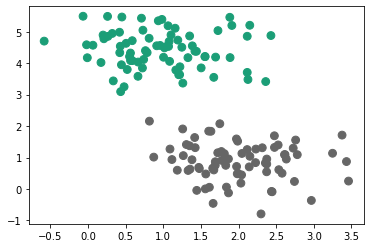

In [155]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=61, cmap='Dark2')
plt.show()

In [159]:
model = SVC(kernel='linear', C=1000)
model.fit(x, y)

SVC(C=1000, kernel='linear')

In [160]:
#beta katsayılarının görüntülenmesi
print(model.coef_)

[[ 0.33224924 -1.99589197]]


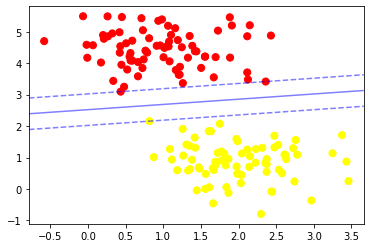

In [173]:
def svm_grafik_karar_fonksiyonu(model, ax=None, plot_support=True):
   
    if ax is None:
        ax = plt.gca()
    #veri koordinat düzlemindeki x ve y ekseni sınırları
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #başlangıç. değeri ve bitiş değeri verilen n tane örneğin x ve y düzleminde oluşması
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    #koordinat füzleminde hayali bir ızgaranın oluşturulması
    Y, X = np.meshgrid(y, x)
    #giriş dizilerinin dikey olarak sıralıyoruz
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    #karar fonksiyoonun hesaplanması
    P = model.decision_function(xy).reshape(X.shape)

    # karar sınırları ve boşluğun görseli
    ax.contour(X, Y, P, colors='b',
               levels=[-1, 0, 1], alpha=0.50,
               linestyles=['--', '-', '--'])

    # destek vektörlerinin plotu
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

# girdi değişkenlerin scatter plot gösterimi
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

# grafiğin çalıştırılması
svm_grafik_karar_fonksiyonu(model)